# Setup Tutorial for 2D Problems

In [21]:
from lsdo_genie import Genie2D

## Generate your point cloud
Begin by importing your point cloud $\mathcal{P}=\{(\mathbf{p}_i,\vec{\mathbf{n}}_i):i=1,\dots, N_\Gamma\}$.
Genie requires your points and normals to be in a numpy array of shape $(N_\Gamma,2)$.
In this example, we will consider an ellipse with 100 points in the point cloud

In [22]:
from lsdo_genie.utils.geometric_shapes import Ellipse
num_points = 100
geom_shape = Ellipse(7,4)
surface_points = geom_shape.surface_points(num_points)
surface_normals = geom_shape.unit_normals(num_points)

## Define the domain of interest
Depending on your optimization problem, you will need to define a rectangular domain for the constraint function.
This domain is shapped as follows:

In [23]:
import numpy as np
x_domain = np.array([-10.0,10.0])
y_domain = np.array([-5.6, 5.6])
custom_domain = np.array([
    x_domain,
    y_domain,
])

## Initialize Genie instance
Next, we will initialize an instance of Genie.
We can use ```python verbose=True``` for Genie to print out steps as we go

In [24]:
genie = Genie2D(verbose=True)

## Input your data
We will now input the point cloud to be saved in the `genie` instance.

In [25]:
genie.input_point_cloud(
    surface_points=surface_points,
    surface_normals=surface_normals,
)

Minimum bbox: 
 [[-7.  7.]
 [-4.  4.]]
Minimum bbox diagonal:  16.1245154965971
num_surface_points:  100 



## Initialize the Bspline
Finally, we will define the Bspline for our non-interference constraint function.
The ```python genie.config()``` command will input the number of control points and the domain of the function and automtically
distribution the Bspline control points spatially throughout the domain
AND initialize their values $\mathbf{C}^\phi$ according to Hicken and Kaur's explicit formulation {cite:p}`Hicken_and_Kaur` 

In [26]:
genie.config(
    domain=custom_domain,
    max_control_points=70,
    min_ratio=0.75,
)

Bspline box: 
 [[-10.   10. ]
 [ -5.6   5.6]]
Control point grid:  [70 52] = 3640
Number of quadrature points:  3400
Initial min distance:  -5.667319111986389
Initial max distance:  3.906473470307496
Bspline order:  4 



We can now visualize the initialized Bspline

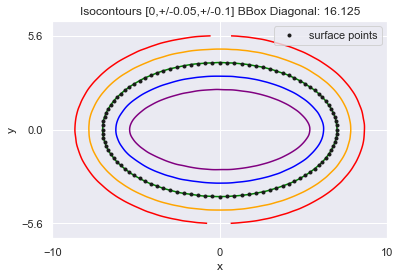

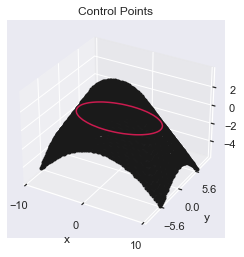

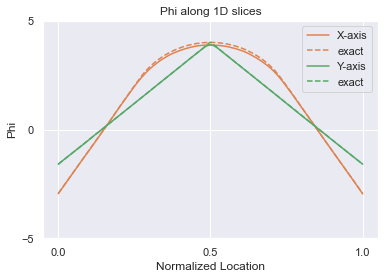

In [27]:
genie.visualize()